# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [147]:
import pandas as pd

In [148]:
data = pd.read_csv('train.csv')

In [149]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [150]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [151]:
train.isna().any()

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

In [152]:
test.isna().any()

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

Пропуски присутствуют только в колонке keyword и location. Посмотрим их тип.

In [153]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [154]:
train = train.fillna('')
train

,id,keyword,location,text,target
1186,1707,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,,just had a panic attack bc I don't have enough...,0
860,1242,blood,,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,,,Officials say a quarantine is in place at an A...,1


In [155]:
test = test.fillna('')
train

,id,keyword,location,text,target
1186,1707,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,,just had a panic attack bc I don't have enough...,0
860,1242,blood,,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,,,Officials say a quarantine is in place at an A...,1


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [162]:
train['target'].value_counts()

0    3024
1    2305
Name: target, dtype: int64

In [163]:
import numpy as np
import matplotlib.pyplot as plt

In [164]:
arr = np.array(train['keyword'].value_counts().index[:10])
dct = dict(list(zip(arr, np.arange(10))))
values_0 = np.zeros(10)
values_1 = np.zeros(10)
for elem in train[['keyword', 'target']].values:
    if elem[0] in dct:
        if elem[1] == 0:
            values_0[dct[elem[0]]] += 1
        else:
            values_1[dct[elem[0]]] += 1

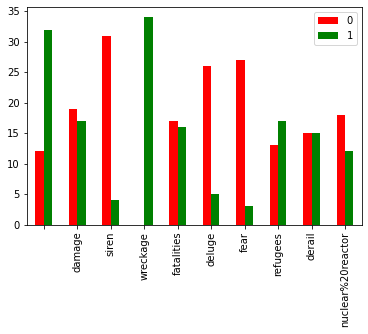

In [165]:
df = pd.DataFrame({0: values_0, 1: values_1})
df.plot(kind='bar', color=['r', 'g'])
plt.xticks(np.arange(10), arr)
plt.show()

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [166]:
train['text'] = train.apply(func=lambda x: x['keyword'] + ' ' + x['location'] + ' ' + x['text'] , axis=1)
train.drop(columns=['id', 'keyword', 'location'], inplace=True)
train

,text,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0
...,...,...
5226,obliteration Merica! @Eganator2000 There aren'...,0
5390,panic just had a panic attack bc I don't have...,0
860,blood Omron HEM-712C Automatic Blood Pressure...,0
7603,Officials say a quarantine is in place at an...,1


In [169]:
test['text'] = test.apply(func=lambda x: x['keyword'] + ' ' + x['location'] + ' ' + x['text'] , axis=1)
test.drop(columns=['id', 'keyword', 'location'], inplace=True)
test

,text,target
2644,destruction So you have a new weapon that can...,1
2227,deluge The f$&amp;@ing things I do for #GISHW...,0
5448,police UK DT @georgegalloway: RT @Galloway4May...,1
132,aftershock Aftershock back to school kick off...,0
6845,"trauma Montgomery County, MD in response to tr...",0
...,...,...
4307,"hellfire 570 Vanderbilt; Brooklyn, NY New cock...",0
3375,evacuation USA Bend Post Office roofers cut ga...,1
1710,collided Monsoon flooding - Monsoon rains hav...,1
4898,massacre Ireland Remember this was a massacre ...,1


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [170]:
from sklearn.feature_extraction.text import CountVectorizer

In [276]:
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train['text'].values)
X.shape

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [277]:
import re
from string import punctuation

In [278]:
def is_word_punctuation(word):
    prog = re.compile('[' + punctuation + ']+')
    if len(prog.findall(word)) > 0:
        return True
    return False

def is_word_digit(word):
    prog = re.compile('[1-9]+')
    if len(prog.findall(word)) > 0:
        return True
    return False

def is_token(word):
    prog = re.compile('[#@]+')
    if len(prog.findall(word)) > 0:
        return True
    return False

def answers(dct):
    ans1 = 0
    ans2 = 0
    ans3 = 0
    for i in dct:
        if is_word_digit(i):
            ans1 += dct[i]
        if is_word_punctuation(i):
            ans2 += dct[i]
        if is_token(i):
            ans3 += dct[i]
    print('Слов с цифрами:', ans1)
    print('Слов с знаками пунктуации', ans2)
    print('Хештегов и упоминмний', ans3)

In [279]:
answers(cnt_vec.vocabulary_)

Слов с цифрами: 28010098
Слов с знаками пунктуации 2862896
Хештегов и упоминмний 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [275]:
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
cnt_vec = CountVectorizer(tokenizer=tt.tokenize)
X = cnt_vec.fit_transform(train['text'].values)
answers(cnt_vec.vocabulary_)

Слов с цифрами: 31272485
Слов с знаками пунктуации 49886874
Хештегов и упоминмний 6338259


Как можно заметить, в первом случае хештеги и упоминания отбрасывались. Также значительно выросло количество токенов с пунктуацией.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [412]:
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pld02\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [450]:
def my_tokenizer(text: str) -> list:
    
    def is_good(word):
        pattern = '[' + punctuation + ']'
        if re.fullmatch('#[a-z]+|[a-z]+|' + pattern +'+[()]' + pattern + '*|' + pattern +'*[()]' + pattern + '+', word):
            return True
        return False
    
    tokens = TweetTokenizer().tokenize(text.lower())    # 0, 1
    
    tokens = [i for i in tokens if is_good(i)]     # 2
    
    tokens = [i for i in tokens if i not in stopwords.words('english')]   # 3
    
    stemmer = SnowballStemmer('english')    # 4
    tokens = [stemmer.stem(i) for i in tokens]
    return tokens

In [466]:
for text in train['text'].head(10):
    print(my_tokenizer(text))

['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['burn', 'except', 'idk', 'realli', 'burn']
['destroy', 'ask', 'destroy', 'hous']
['wound', 'maracay', 'nirgua', 'venezuela', 'polic', 'offic', 'wound', 'suspect', 'dead',

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [475]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import f1_score

In [473]:
X_train = train['text'].values
y_train = train['target'].values
X_test = test['text'].values
y_test = test['target'].values

In [474]:
cnt_vec = CountVectorizer(tokenizer=my_tokenizer)
bow = cnt_vec.fit_transform(X_train)
bow_test = cnt_vec.transform(X_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [478]:
clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
f1_score(pred, y_test)

0.7447280799112098

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [479]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [486]:
# 1
tfidf_vec = TfidfVectorizer(tokenizer=my_tokenizer)
bow = tfidf_vec.fit_transform(X_train)
bow_test = tfidf_vec.transform(X_test)
print(bow.shape)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

(5329, 10479)


In [487]:
clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
f1_score(pred, y_test)

0.7457811649428416

Качество практически не изменилось.

In [497]:
# 2
tfidf_vec = TfidfVectorizer(tokenizer=my_tokenizer, max_df=0.9)
bow = tfidf_vec.fit_transform(X_train)
bow_test = tfidf_vec.transform(X_test)
print(bow.shape)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

(5329, 10479)


In [498]:
clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
f1_score(pred, y_test)

0.7457811649428416

Качество не изменилось. Размер матрицы остался таким же.

In [504]:
# 3
tfidf_vec = TfidfVectorizer(tokenizer=my_tokenizer, min_df=0.0005, max_df=0.9)
bow = tfidf_vec.fit_transform(X_train)
bow_test = tfidf_vec.transform(X_test)
print(bow.shape)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

(5329, 3133)


In [505]:
clf = LogisticRegression(max_iter=400, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
f1_score(pred, y_test)

0.7500000000000001

Качество уменьшилось. Размер матрицы сильно уменьшился

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [503]:
from sklearn.feature_extraction.text import HashingVectorizer

In [512]:
hash_vec = HashingVectorizer(n_features=5000, tokenizer=my_tokenizer)
bow = hash_vec.fit_transform(X_train)
bow_test = hash_vec.transform(X_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

C:\Users\pld02\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [513]:
clf = LogisticRegression(max_iter=400, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
f1_score(pred, y_test)

0.7317862924986509

Наибольший результат показал подход с tf-idf с ограничениями на показатель df

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [551]:
tfidf_vec = TfidfVectorizer(tokenizer=my_tokenizer, min_df=0.0003)
bow = tfidf_vec.fit_transform(X_train)
bow_test = tfidf_vec.transform(X_test)
print(bow.shape)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

(5329, 4520)


In [553]:
clf = LogisticRegression(max_iter=500, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
f1_score(pred, y_test)

0.7525829255029908

In [556]:
hash_vec = HashingVectorizer()
bow = hash_vec.fit_transform(X_train)
bow_test = hash_vec.transform(X_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [557]:
clf = LogisticRegression(max_iter=500, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
f1_score(pred, y_test)

0.7575590984057174